# Bharat Intern Project No :- 1

In [1]:
# data collection
# !pip install pandas-datareader

In [2]:
# !pip install pandas-datareader

In [3]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pdr.get_data_tiingo("AAPL", api_key = "c10ccb12891ca4327afb4e8ab6b4df87bb84215d")

C:\Users\SATYAJEET AIWALE\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
df.head(10)

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-08-10 00:00:00+00:00  207.53  209.10  206.67  207.36  24611202   
       2018-08-13 00:00:00+00:00  208.87  210.95  207.70  207.70  25890880   
       2018-08-14 00:00:00+00:00  209.75  210.56  208.26  210.16  20748010   
       2018-08-15 00:00:00+00:00  210.24  210.74  208.33  209.22  28807564   
       2018-08-16 00:00:00+00:00  213.32  213.81  211.47  211.75  28500367   
       2018-08-17 00:00:00+00:00  217.58  217.95  213.16  213.44  35426997   
       2018-08-20 00:00:00+00:00  215.46  219.18  215.11  218.10  30287695   
       2018-08-21 00:00:00+00:00  215.04  217.19  214.03  216.80  26159755   
       2018-08-22 00:00:00+00:00  215.05  216.36  213.84  214.10  19018131   
       2018-08-23 00:00:00+00:00  215.49  217.05  214.60  214.65  18883224   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-08-10 00:00:00+00:00  49.753042  50.129432  49.546866  49.712286   
       2018-08-13 00:00:00+00:00  50.074292  50.572949  49.793797  49.793797   
       2018-08-14 00:00:00+00:00  50.285262  50.479451  49.928051  50.383555   
       2018-08-15 00:00:00+00:00  50.402734  50.522604  49.944833  50.158201   
       2018-08-16 00:00:00+00:00  51.141131  51.258603  50.697613  50.764740   
       2018-08-17 00:00:00+00:00  52.162419  52.251122  51.102772  51.169899   
       2018-08-20 00:00:00+00:00  51.654172  52.546001  51.570264  52.287083   
       2018-08-21 00:00:00+00:00  51.553482  52.068921  51.311345  51.975423   
       2018-08-22 00:00:00+00:00  51.555879  51.869937  51.265795  51.328127   
       2018-08-23 00:00:00+00:00  51.661364  52.035357  51.447997  51.459984   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-08-10 00:00:00+00:00   98444808     0.73          1.0  
       2018-08-13 00:00:00+00:00  103563520     0.00          1.0  
       2018-08-14 00:00:00+00:00   82992040     0.00          1.0  
       2018-08-15 00:00:00+00:00  115230256     0.00          1.0  
       2018-08-16 00:00:00+00:00  114001468     0.00          1.0  
       2018-08-17 00:00:00+00:00  141707988     0.00          1.0  
       2018-08-20 00:00:00+00:00  121150780     0.00          1.0  
       2018-08-21 00:00:00+00:00  104639020     0.00          1.0  
       2018-08-22 00:00:00+00:00   76072524     0.00          1.0  
       2018-08-23 00:00:00+00:00   75532896     0.00          1.0

In [7]:
df2 = df.reset_index()['close']

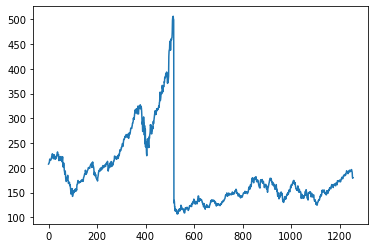

In [8]:
plt.plot(df2)

In [9]:
# LSTM are very much sensetive to the scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

C:\Users\SATYAJEET AIWALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
len(df2)*0.65

816.4

In [11]:
# splitting dataset into train and test 
training_size = int(len(df2)*0.65)
test_size = len(df2)-training_size
train_data, test_data = df2[0:training_size,:],df2[training_size:len(df2),:1]

In [12]:
print(training_size, test_size)

816 440


In [13]:
df2[0:training_size,:].shape

(816, 1)

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return np.array(dataX), np.array(dataY)    

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape, y_train.shape)

(715, 100) (715,)


In [17]:
 print(X_test.shape, y_test.shape)

(339, 100) (339,)


In [18]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [19]:
# !pip install tensorflow

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100,batch_size = 64, verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 378ms/step - loss: 0.0437 - val_loss: 0.0013
Epoch 2/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0233 - val_loss: 0.0077
Epoch 3/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0151 - val_loss: 7.3036e-04
Epoch 4/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0111 - val_loss: 0.0015
Epoch 5/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0092 - val_loss: 3.5051e-04
Epoch 6/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0082 - val_loss: 3.8367e-04
Epoch 7/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0075 - val_loss: 3.7703e-04
Epoch 8/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0066 - val_loss: 4.6506e-04
Epoch 9/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0062 - val_loss: 5.4565e-04
Epoch 10/100
12/12 [==============================] - 3s 214ms/ste

12/12 [==============================] - 1s 102ms/step - loss: 0.0012 - val_loss: 2.0652e-04
Epoch 79/100
12/12 [==============================] - 1s 102ms/step - loss: 0.0011 - val_loss: 2.3775e-04
Epoch 80/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0020 - val_loss: 2.2705e-04
Epoch 81/100
12/12 [==============================] - 1s 102ms/step - loss: 0.0019 - val_loss: 5.7579e-04
Epoch 82/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0018 - val_loss: 1.9356e-04
Epoch 83/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0012 - val_loss: 1.9885e-04
Epoch 84/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0016 - val_loss: 2.0008e-04
Epoch 85/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0016 - val_loss: 1.9195e-04
Epoch 86/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0014 - val_loss: 2.3646e-04
Epoch 87/100
12/12 [==============================] - 1s 10

In [24]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 20ms/step


In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.30280220843608

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

159.25437532972904

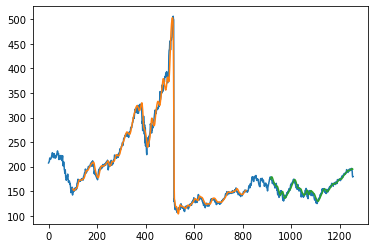

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.16871634314339

In [33]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.20969668]
100
1 day input [0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511
 0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323
 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969
 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419
 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902 0.20348153
 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645
 0.21613024 0.21314966 0.21517846 0

10 day output [[0.19937287]]
11 day input [0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211
 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202
 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374
 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428
 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755
 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266
 0.21122104 0.18822793

20 day output [[0.2081643]]
21 day input [0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308
 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584
 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264
 0.20969668 0.20497324 0.20185897 0.20000173 0.19897893 0.19847371
 0.19829215 0.19833042